In [3]:
import numpy as np 

In [4]:
import tensorflow as tf

2024-12-01 14:05:51.802883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733079951.908532   12004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733079951.935833   12004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 14:05:52.171804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
celcius = np.array([-40, -10, 0, 8, 15, 22, 38],dtype=float) #data array for celcius values

In [6]:
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100],dtype=float) #data array for farenheit values

# modelo de Keras para darle las capas y trabajar

In [7]:
capa = tf.keras.layers.Dense(units=1,input_shape=[1])
modelo = tf.keras.Sequential([capa])

/home/juanandresyounghoyos/Documents/first_Neural_network/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733079960.670459   12004 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2565 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


### El compilado prepara el modelo para ser entrenado

In [8]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [9]:
print("Comienza el entrenamiento...")
historial = modelo.fit(celcius, fahrenheit, epochs = 2000,verbose=False) 
print("Modelo entrenado!")

Comienza el entrenamiento...


I0000 00:00:1733079974.728090   12141 service.cc:148] XLA service 0x7b9478006980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733079974.728273   12141 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-12-01 14:06:14.764904: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733079974.828392   12141 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1733079975.013453   12141 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Modelo entrenado!


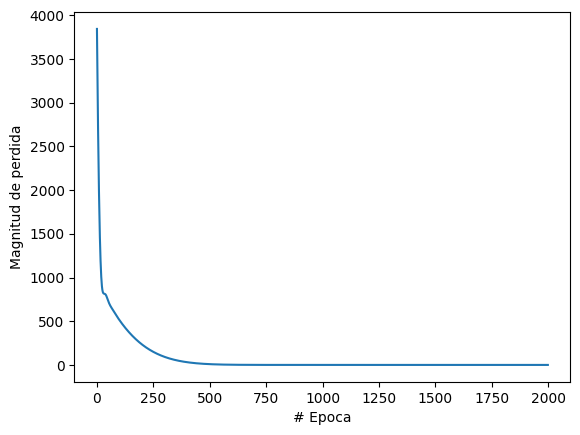

In [10]:
import matplotlib.pyplot as plt #plot to see training
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [13]:
print("Hagamos predicción")
#Changed lis [100.0] to np.array for input values in Kera
resultado = modelo.predict(np.array([100.0])) 
print("El resultado de 100 grados celcius es " + str(resultado)+ "°fahrenheit")

Hagamos predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
El resultado de 100 grados celcius es [[211.74744]]°fahrenheit


# Being a lineal function this model works really well

In [12]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7979496]], dtype=float32), array([31.952478], dtype=float32)]
